In [1]:
! pip install flloat

  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 959.4 kB/s eta 0:00:000:00:01
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [5]:
import flloat
from flloat.parser.ltlf import LTLfParser

formula = "F((secondfloor & F(greenroom)))"
parser = LTLfParser()

parsed_formula = parser(formula)

# Trace for Option A
t = [
    {'firstfloor': False, 'secondfloor': False, 'thirdfloor': False, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': False, 'landmark1': False},
    {'firstfloor': False, 'secondfloor': False, 'thirdfloor': True, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': True, 'orangeroom': False, 'landmark1': False},
    {'firstfloor': False, 'secondfloor': True, 'thirdfloor': False, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': False, 'landmark1': False}
]

print(parsed_formula.truth(t,0))
assert parsed_formula.truth(t,0)

UnexpectedCharacters: No terminal matches '~' in the current parser context, at line 1 col 18

F((secondfloor & ~ F(greenroom)))
                 ^
Expected one of: 
	* LSEPARATOR
	* NOT
	* WEAK_NEXT
	* ALWAYS
	* SYMBOL_NAME
	* pl__FALSE
	* LAST
	* EVENTUALLY
	* NEXT
	* END
	* pl__TRUE

Previous tokens: Token('AND', '&')


In [4]:
t2 =   [
    {'firstfloor': False, 'secondfloor': False, 'thirdfloor': False, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': False, 'landmark1': False},
    {'firstfloor': True, 'secondfloor': False, 'thirdfloor': False, 'redroom': True, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': False, 'landmark1': False},
    {'firstfloor': False, 'secondfloor': True, 'thirdfloor': False, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': False, 'landmark1': False},
    {'firstfloor': False, 'secondfloor': False, 'thirdfloor': True, 'redroom': False, 'yellowroom': False, 'greenroom': False, 'purpleroom': False, 'orangeroom': True, 'landmark1': False}
]
print(parsed_formula.truth(t2,0))
assert not parsed_formula.truth(t2,0)

False


In [4]:
parser = LTLfParser()
formula = "F (a & !b)"
parsed_formula = parser(formula)

trace = [{'a': False, 'b': False}, {'a': True, 'b': False},  {'a': False, 'b': False}]

assert parsed_formula.truth(trace,0)

dfa = parsed_formula.to_automaton()
print(dfa)
graph = dfa.to_graphviz()
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

{
    "id": "FOLIO_dev_4",
    "context": "All employees who schedule a meeting with their customers will appear in the company today. Everyone who has lunch in the company schedules meetings with their customers. Employees will either have lunch in the company or have lunch at home. If an employee has lunch at home, then he/she is working remotely from home. All employees who are in other countries work remotely from home. No managers work remotely from home. James is either a manager and appears in the company today or neither a manager nor appears in the company today.",
    "question": "Based on the above information, is the following statement true, false, or uncertain? James does not have lunch in the company.",
    "options": [
      "A) True",
      "B) False",
      "C) Uncertain"
    ],
    "answer": "C"
  },

In [5]:
In an ideal human-robot interaction scenario, humans would give robots tasks in the form of natural language utterances and gestures. The variation in language used allows for specifying tasks at varying levels of spatial abstractions, while specifying temporal constraints. Meaning can be conveyed with language at different levels of spatial abstraction, in terms of high- level goals (such as “fly to the end of the first floor”), lower- level specifications (such as “fly east, go south, go south and fly east again”), or mixed-level (such as “go to the yellow room and the second floor”). Language can also express explicit constraints on the path taken to reach the goal (for example, “fly to the red room first, without going through the green room.”). The former category of commands requires an agent to fluidly move within an abstraction hierarchy (that is, knowing that a floor is at a higher level than individual rooms and directions), while the latter command restricts the space of possible paths that can be taken and sometimes#

SyntaxError: invalid syntax (2930242898.py, line 1)

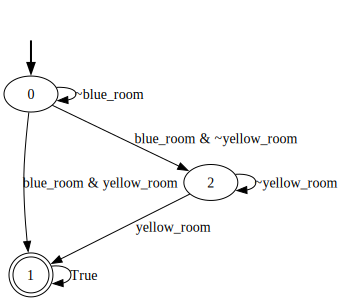

In [ ]:
# Write a NL context of the domain in which the drone is moving. 

# 1. Write a sentence in Natural Language that is transalated to the following LTL formula
# give the LLM a multiple choice A,B,C,D where it takes natural language as an input and converts the sentences into traces in the following format:

#Sentence A: "First, I enter the blue room, and then later on, I enter the yellow room."
tA = [{'blue_room': True, 'yellow_room': False}, {'blue_room': True, 'yellow_room': True}]

#Sentence B: "Eventually, I find myself in the blue room, and after some time, I also end up in the yellow room."
tB = [{'blue_room': False, 'yellow_room': False}, {'blue_room': True, 'yellow_room': False}, {'blue_room': True, 'yellow_room': True}]
#Sentence C: "At some point in the future, I will be in the blue room, followed by entering the yellow room later."

#Sentence D: "I will eventually reach the blue room and subsequently enter the yellow room after that."




# context: The problem is a gridworld with three floors, each consisting of rooms that consist of grid cells. The red room and Yellow room are located on floor 1, the Green room is located in floor 2, and the Orange and Purple room are located on floor 3. 
# 2. Obtain an LTL formula

import flloat
from flloat.parser.ltlf import LTLfParser

parser = LTLfParser()

formula = "F (blue_room & F (yellow_room))"
parsed_formula = parser(formula)

# Sentence: "First, I am in neither room, then I enter the blue room, finally I am in both the blue room and the yellow room at the same time." 
t1 = [{'blue_room': False, 'yellow_room': False}, {'blue_room': True, 'yellow_room': False},  {'blue_room': True, 'yellow_room': True}]

assert parsed_formula.truth(t1,0)

dfa = parsed_formula.to_automaton()
print(dfa)
graph = dfa.to_graphviz()
graph